In [6]:
import matplotlib.pyplot as plt
import numpy as np

#plt.style.available       
#plt.style.use("ggplot") 

## Accuracy vs Temperature (2 state)

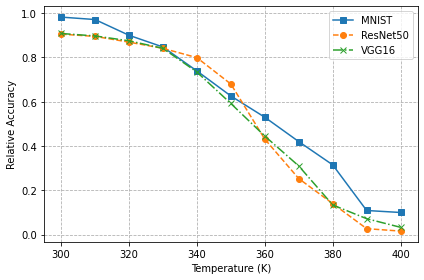

In [7]:
temperature = [300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400]
MNIST = [0.982, 0.971, 0.900, 0.847, 0.739, 0.626, 0.530, 0.420, 0.315, 0.109, 0.100]
ResNet50 = [0.905, 0.895, 0.869, 0.841, 0.799, 0.680, 0.431, 0.253, 0.140, 0.027, 0.016]
VGG16 = [0.908, 0.897, 0.875, 0.841, 0.734, 0.592, 0.445, 0.310, 0.134, 0.072, 0.033]

#plt.figure(figsize = (6, 3))
plt.plot(temperature, MNIST, '-s', label="MNIST")
plt.plot(temperature, ResNet50, '--o', label="ResNet50")
plt.plot(temperature, VGG16, '-.x', label="VGG16")
plt.xlabel("Temperature (K)")
plt.ylabel("Relative Accuracy")
plt.grid(linestyle='--')
plt.legend()
plt.tight_layout()
#plt.title('Accuracy vs Temperature')
#plt.savefig('ThermalvsAcc2.pdf')
plt.show()

## Conductance vs Temperature (2 state)

[25974025.97402597 26315789.47368421 27027027.02702703 27777777.77777778
 29850746.26865672 32573289.90228013 37735849.05660377 40000000.
 41666666.66666666 42735042.73504274 43103448.27586207]
[2.00000000e+08 1.96078431e+08 1.92307692e+08 1.88679245e+08
 1.85185185e+08 1.81818182e+08 1.78571429e+08 1.75438596e+08
 1.72413793e+08 1.69491525e+08 1.66666667e+08]


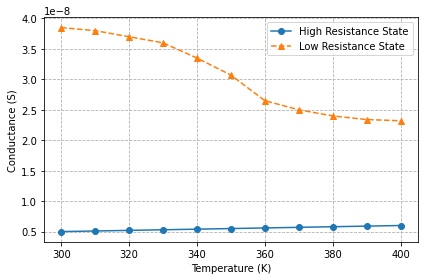

In [8]:
HRS_min = 6e-9
HRS_max = 5e-9
temperature = [300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400]
HRS = [HRS_max - i*(HRS_max - HRS_min)/(len(temperature)-1) for i in range(len(temperature))]
LRS = [3.85e-8, 3.8e-8, 3.7e-8, 3.6e-8, 3.35e-8, 3.07e-8, 2.65e-8, 2.5e-8, 2.4e-8, 2.34e-8, 2.32e-8]
print(1/np.array(LRS))
print(1/np.array(HRS))

#plt.figure(figsize = (6, 3))
plt.plot(temperature, HRS, '-o', label="High Resistance State")
plt.plot(temperature, LRS, '--^', label="Low Resistance State")
plt.xlabel("Temperature (K)")
plt.ylabel("Conductance (S)")
plt.grid(linestyle='--')
plt.legend()
plt.tight_layout()
#plt.title('Conductance vs Temperature')
#plt.savefig('ThermalvsConductance2.pdf')
plt.show()

## PDF (2 state)

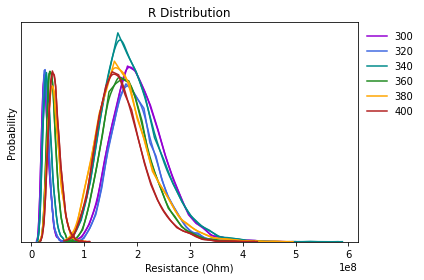

In [23]:
import seaborn as sns
import scipy.stats as stats

# My data
#25	4.18e+07	1.70e+06
#50	4.07e+07	1.75e+06
#75	3.66e+07	1.85e+06
#100	3.66e+07	1.95e+06
#125	3.56e+07	2.00e+06

size = 10000  # number of random numbers to generate
#HRS = [4.18e+07, 4.07e+07, 3.66e+07, 3.66e+07, 3.56e+07]
#LRS = [1.70e+06, 1.75e+06, 1.85e+06, 1.95e+06, 1.95e+06]
#temperature = ["300 K", "325 K", "350 K", "375 K", "400 K"]
HRS_min = 6e-9
HRS_max = 5e-9
temperature = ["300", "320", "340", "360", "380", "400"]
colors = ["darkviolet", "royalblue", "darkcyan", "forestgreen", "orange", "firebrick"]
HRS = [HRS_max - i*(HRS_max - HRS_min)/(len(temperature)-1) for i in range(len(temperature))]
LRS = [3.85e-8, 3.7e-8, 3.35e-8, 2.65e-8, 2.4e-8, 2.32e-8]
LRS = 1/np.array(LRS)
HRS = 1/np.array(HRS)

def noise(size, alpha):
    noise = np.random.normal(0, 1, size)
    noise = noise/np.max(noise)*alpha

    return noise

# Some right but efficientless method
#Ghrs = []
#Glrs = []
#g_tmp = 0
#for g in G_range[1:]:
#    hrs = HRS*(1+noise(size, LRS/HRS))
#    lrs = LRS*(1+noise(size, 1))
#
#    for i in range(size):
#        if hrs[i] >= g_tmp and hrs[i] <= g:
#            Ghrs.append(hrs[i])
#
#        if lrs[i] >= g_tmp and lrs[i] <= g:
#            Glrs.append(lrs[i])
#    
#    g_tmp = g

for i in range(len(HRS)):
    Ghrs = HRS[i]/np.exp(noise(size, 1)) #LRS[i]/HRS[i]
    Glrs = LRS[i]/np.exp(noise(size, 1))

    # Plot the histogram
    sns.histplot(Ghrs, bins= 30, kde=True, element='poly', fill=False, stat='count', color=colors[i], label=temperature[i])
    sns.histplot(Glrs, bins= 30, kde=True, element='poly', fill=False, stat='count', color=colors[i])

plt.xlabel('Resistance (Ohm)')
plt.ylabel('Probability')
plt.yticks([])
plt.title('R Distribution')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False)
plt.tight_layout()
#plt.savefig('ThermalPDF2.pdf')
#plt.savefig('ThermalPDF2.eps')
plt.show()

## Conductance vs Temperature (4 state)

In [ ]:
HRS3 = np.array([0.375, 0.326, 0.261, 0.197, 0.150])*1e5
HRS2 = np.array([0.116, 0.098, 0.078, 0.067, 0.057])*1e5
HRS1 = np.array([0.051, 0.051, 0.050, 0.047, 0.048])*1e5
LRS = np.array([0.0140, 0.0146, 0.0150, 0.0154, 0.0159])*1e5
mean = stats.gmean([HRS3, HRS2, HRS1, LRS])
temperature = [323, 373, 423, 473, 523]

plt.figure(figsize = (8, 4))
plt.semilogy(temperature, HRS3, '-o', label="HRS3")
plt.semilogy(temperature, HRS2, '-.x', label="HRS2")
plt.semilogy(temperature, HRS1, ':s', label="HRS1")
plt.semilogy(temperature, LRS, '--^', label="LRS")
plt.semilogy(temperature, mean, '--', color='grey', label="geometric mean")
plt.xlabel("Temperature (K)")
plt.ylabel("Resistance (Ohm)")
plt.ylim(1e3, 1e5)
plt.grid(linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.tight_layout()
#plt.title('Conductance vs Temperature')
#plt.savefig('ThermalvsConductance4.pdf')
plt.show()

## PDF (4 state)

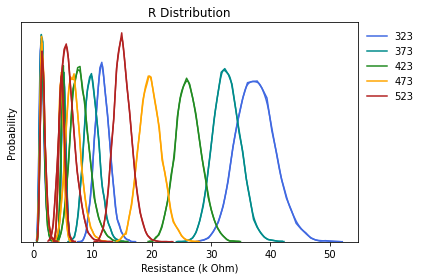

In [21]:
size = 10000  # number of random numbers to generate
HRS3 = np.array([0.375, 0.326, 0.261, 0.197, 0.150])*1e2
HRS2 = np.array([0.116, 0.098, 0.078, 0.067, 0.057])*1e2
HRS1 = np.array([0.051, 0.051, 0.050, 0.047, 0.048])*1e2
LRS = np.array([0.0140, 0.0146, 0.0150, 0.0154, 0.0159])*1e2
temperature = ["323", "373", "423", "473", "523"]
colors = ["royalblue", "darkcyan", "forestgreen", "orange", "firebrick"]

def noise(size, alpha):
    noise = np.random.normal(0, 1, size)
    noise = noise/np.max(noise)*alpha

    return noise

for i in range(len(LRS)):
    Ghrs3 = HRS3[i]/np.exp(noise(size, HRS2[i]/HRS3[i]))
    Ghrs2 = HRS2[i]/np.exp(noise(size, HRS1[i]/HRS2[i]))
    Ghrs1 = HRS1[i]/np.exp(noise(size, LRS[i]/HRS1[i]))
    Glrs = LRS[i]/np.exp(noise(size, 1))

    # Plot the histogram
    sns.histplot(Ghrs3, bins= 30, kde=True, element='poly', fill=False, stat='count', color=colors[i], label=temperature[i])
    sns.histplot(Ghrs2, bins= 30, kde=True, element='poly', fill=False, stat='count', color=colors[i])
    sns.histplot(Ghrs1, bins= 30, kde=True, element='poly', fill=False, stat='count', color=colors[i])
    sns.histplot(Glrs, bins= 30, kde=True, element='poly', fill=False, stat='count', color=colors[i])

plt.xlabel('Resistance (k Ohm)')
plt.ylabel('Probability')
plt.yticks([])
plt.title('R Distribution')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.savefig('ThermalPDF4.pdf')
#plt.savefig('ThermalPDF4.eps')
plt.show()